<a href="https://colab.research.google.com/github/VasantiP/coursera/blob/main/Medical_Image_Diagnosis_Chest_XRay_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

AI for Medical Diagnosis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
sns.set()

In [6]:
train_df = pd.read_csv('/content/Data_Entry_2017_v2020.csv', nrows=200, delimiter=',')

In [ ]:
train_df

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Sex,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y]
0,00000001_000.png,Cardiomegaly,0,1,57,M,PA,2682,2749,0.143,0.143
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168
3,00000002_000.png,No Finding,0,2,80,M,PA,2500,2048,0.171,0.171
4,00000003_001.png,Hernia,0,3,74,F,PA,2500,2048,0.168,0.168
...,...,...,...,...,...,...,...,...,...,...,...
195,00000040_000.png,No Finding,0,40,66,M,PA,2500,2048,0.168,0.168
196,00000040_001.png,Emphysema,1,40,66,M,AP,2500,2048,0.168,0.168
197,00000040_002.png,No Finding,2,40,66,M,AP,2500,2048,0.168,0.168
198,00000040_003.png,Consolidation|Mass,3,40,67,M,PA,2500,2048,0.168,0.168


In [7]:
findingLabels = train_df['Finding Labels'].unique()
findingLabels = [label for sublist in findingLabels for label in sublist.split('|')]
findingLabels = set(findingLabels)
findingLabels

{'Atelectasis',
 'Cardiomegaly',
 'Consolidation',
 'Edema',
 'Effusion',
 'Emphysema',
 'Fibrosis',
 'Hernia',
 'Infiltration',
 'Mass',
 'No Finding',
 'Nodule',
 'Pleural_Thickening',
 'Pneumonia',
 'Pneumothorax'}

In [8]:
# Check data type of each column and whether null values are present
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Image Index                  200 non-null    object 
 1   Finding Labels               200 non-null    object 
 2   Follow-up #                  200 non-null    int64  
 3   Patient ID                   200 non-null    int64  
 4   Patient Age                  200 non-null    int64  
 5   Patient Sex                  200 non-null    object 
 6   View Position                200 non-null    object 
 7   OriginalImage[Width          200 non-null    int64  
 8   Height]                      200 non-null    int64  
 9   OriginalImagePixelSpacing[x  200 non-null    float64
 10  y]                           200 non-null    float64
dtypes: float64(2), int64(5), object(4)
memory usage: 17.3+ KB


In [9]:
print(f"total patient ids:{train_df['Patient ID'].count()}, unique ids: {train_df['Patient ID'].value_counts().shape[0]}")
print('multiple records per patient id, therefore need to ensure patient ids do not show up in multiple datasets')

total patient ids:200, unique ids: 41
multiple records per patient id, therefore need to ensure patient ids do not show up in multiple datasets


In [10]:
for label in findingLabels:
    train_df[label] = train_df['Finding Labels'].apply(lambda x: 1 if label in x else 0)

display(train_df.head())

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Sex,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,...,Edema,Fibrosis,Nodule,No Finding,Pneumonia,Consolidation,Infiltration,Hernia,Effusion,Pneumothorax
0,00000001_000.png,Cardiomegaly,0,1,57,M,PA,2682,2749,0.143,...,0,0,0,0,0,0,0,0,0,0
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,...,0,0,0,0,0,0,0,0,0,0
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,...,0,0,0,0,0,0,0,0,1,0
3,00000002_000.png,No Finding,0,2,80,M,PA,2500,2048,0.171,...,0,0,0,1,0,0,0,0,0,0
4,00000003_001.png,Hernia,0,3,74,F,PA,2500,2048,0.168,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
# Check for balanced dataset
for label in findingLabels:
    print(f"{label} : {train_df[label].sum()}")

No Finding : 64
Hernia : 8
Effusion : 31
Pneumonia : 2
Edema : 21
Pleural_Thickening : 9
Mass : 16
Nodule : 7
Infiltration : 53
Cardiomegaly : 37
Consolidation : 8
Fibrosis : 5
Emphysema : 22
Pneumothorax : 20
Atelectasis : 17


In [ ]:
# Download the 56 zip files in Images_png in batches
import urllib.request

# URLs for the zip files
links = [
    'https://nihcc.box.com/shared/static/vfk49d74nhbxq3nqjg0900w5nvkorp5c.gz'
  #   'https://nihcc.box.com/shared/static/i28rlmbvmfjbl8p2n3ril0pptcmcu9d1.gz',
  #   'https://nihcc.box.com/shared/static/f1t00wrtdk94satdfb9olcolqx20z2jp.gz',
	# 'https://nihcc.box.com/shared/static/0aowwzs5lhjrceb3qp67ahp0rd1l1etg.gz',
  #   'https://nihcc.box.com/shared/static/v5e3goj22zr6h8tzualxfsqlqaygfbsn.gz',
	# 'https://nihcc.box.com/shared/static/asi7ikud9jwnkrnkj99jnpfkjdes7l6l.gz',
	# 'https://nihcc.box.com/shared/static/jn1b4mw4n6lnh74ovmcjb8y48h8xj07n.gz',
  #   'https://nihcc.box.com/shared/static/tvpxmn7qyrgl0w8wfh9kqfjskv6nmm1j.gz',
	# 'https://nihcc.box.com/shared/static/upyy3ml7qdumlgk2rfcvlb9k6gvqq2pj.gz',
	# 'https://nihcc.box.com/shared/static/l6nilvfa9cg3s28tqv1qc1olm3gnz54p.gz',
	# 'https://nihcc.box.com/shared/static/hhq8fkdgvcari67vfhs7ppg2w6ni4jze.gz',
	# 'https://nihcc.box.com/shared/static/ioqwiy20ihqwyr8pf4c24eazhh281pbu.gz'
]

for idx, link in enumerate(links):
    fn = 'images_%02d.tar.gz' % (idx+1)
    print('downloading'+fn+'...')
    urllib.request.urlretrieve(link, fn)  # download the zip file

print("Download complete. Please check the checksums")

downloadingimages_01.tar.gz...
Download complete. Please check the checksums


In [ ]:
!tar -xzf /content/images_01.tar.gz

total images: 200, images in directory: 4999
filtered images: 200


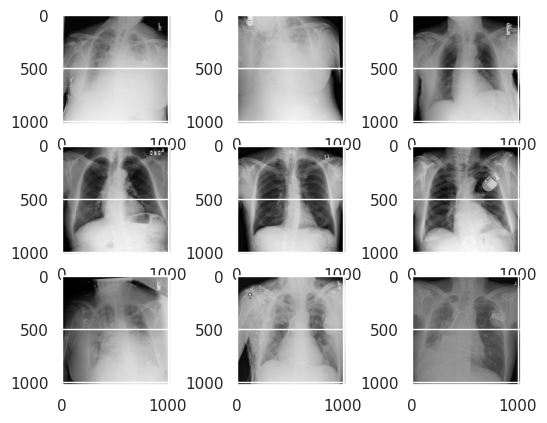

In [ ]:
images = train_df['Image Index'].values
img_dir = '/content/images/'
images_in_dir = os.listdir(img_dir)

print(f"total images: {len(images)}, images in directory: {len(images_in_dir)}")
images = [img for img in images if img in images_in_dir]
print(f"filtered images: {len(images)}")

# Extract 9 random images
random_images = []
while len(random_images) < 9:
    img = np.random.choice(images)
    if img not in random_images:
        random_images.append(img)

for i in range(9):
    plt.subplot(3, 3, i + 1)
    imgs = plt.imread(os.path.join(img_dir, random_images[i]))
    plt.imshow(imgs, cmap='gray')

The dimensions of the image are: 1024 pixels width and 1024 pixels height, one single color channel
The maximum pixel value is 1.0000 and the minimum is 0.0000
The mean value of the pixels is 0.5025 and the standard deviation is 0.2644


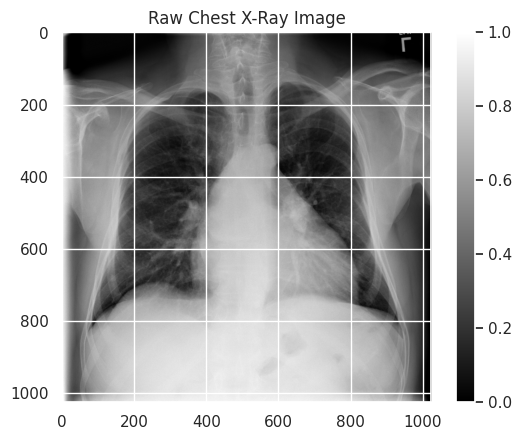

In [ ]:
# Get first images
sample_img = images[0]
raw_image = plt.imread(os.path.join(img_dir, sample_img))
plt.imshow(raw_image, cmap='gray')
plt.colorbar()
plt.title('Raw Chest X-Ray Image')
print(f"The dimensions of the image are: {raw_image.shape[0]} pixels width and {raw_image.shape[1]} pixels height, one single color channel")
print(f"The maximum pixel value is {raw_image.max():.4f} and the minimum is {raw_image.min():.4f}")
print(f"The mean value of the pixels is {raw_image.mean():.4f} and the standard deviation is {raw_image.std():.4f}")

/tmp/ipython-input-3853349667.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(raw_image.ravel(), label=f'Pixel Mean {np.mean(raw_image):.4f} & Standard Deviation {np.std(raw_image):.4f}', kde=False)


Text(0.5, 1.0, 'Distribution of Pixel Intensities in the Image')

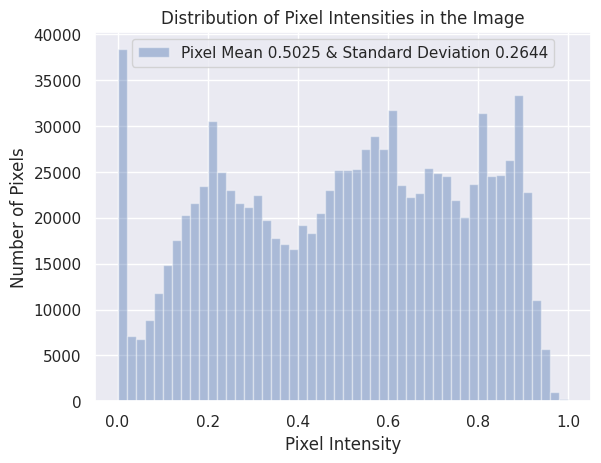

In [ ]:
# Plot a histogram of the distribution of the pixels
sns.distplot(raw_image.ravel(), label=f'Pixel Mean {np.mean(raw_image):.4f} & Standard Deviation {np.std(raw_image):.4f}', kde=False)
plt.legend(loc='upper center')
plt.xlabel('Pixel Intensity')
plt.ylabel('Number of Pixels')
plt.title('Distribution of Pixel Intensities in the Image')

In [3]:
!pip install keras

In [7]:
# Import data generator from keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
image_generator = ImageDataGenerator(
    samplewise_center=True,  # set each sample mean to 0
    samplewise_std_normalization= True,  # divide each input by its std
)

In [ ]:
# Use the image_generator to normalize the data by subtracting mean and dividing by std deviation
# Flow from directory with specified batch size and target image size
# Reduce image size to 320x320

generator = image_generator.flow_from_dataframe(
    dataframe=train_df,
    directory="/content/images/",
    x_col="Image Index",
    y_col=['Mass'],
    class_mode="raw",
    batch_size=1,
    shuffle=False,
    target_size=(320,320),
)

Found 200 validated image filenames.


The dimensions of the image are 320 pixels width and 320 pixels height
The maximum pixel value is 1.8811 and the minimum is -1.9009
The mean value of the pixels is 0.0000 and the standard deviation is 1.0000


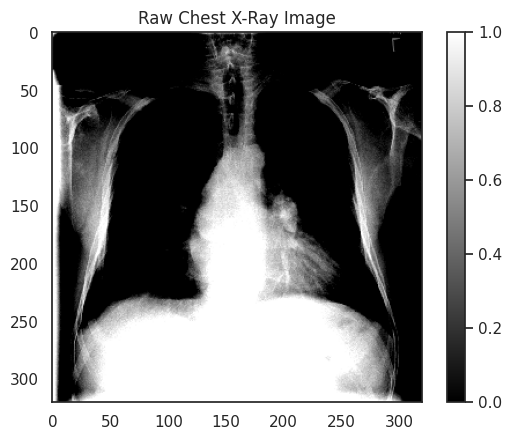

In [ ]:
sns.set_style('white')
generated_image, label = generator.__getitem__(0)
plt.imshow(generated_image[0], cmap='gray')
plt.colorbar()
plt.title('Raw Chest X-Ray Image')
print(f"The dimensions of the image are {generated_image.shape[1]} pixels width and {generated_image.shape[2]} pixels height")
print(f"The maximum pixel value is {generated_image.max():.4f} and the minimum is {generated_image.min():.4f}")
print(f"The mean value of the pixels is {generated_image.mean():.4f} and the standard deviation is {generated_image.std():.4f}")

/tmp/ipython-input-3108173275.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(raw_image.ravel(),
/tmp/ipython-input-3108173275.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(generated_image[0].ravel(),


Text(0, 0.5, '# Pixel')

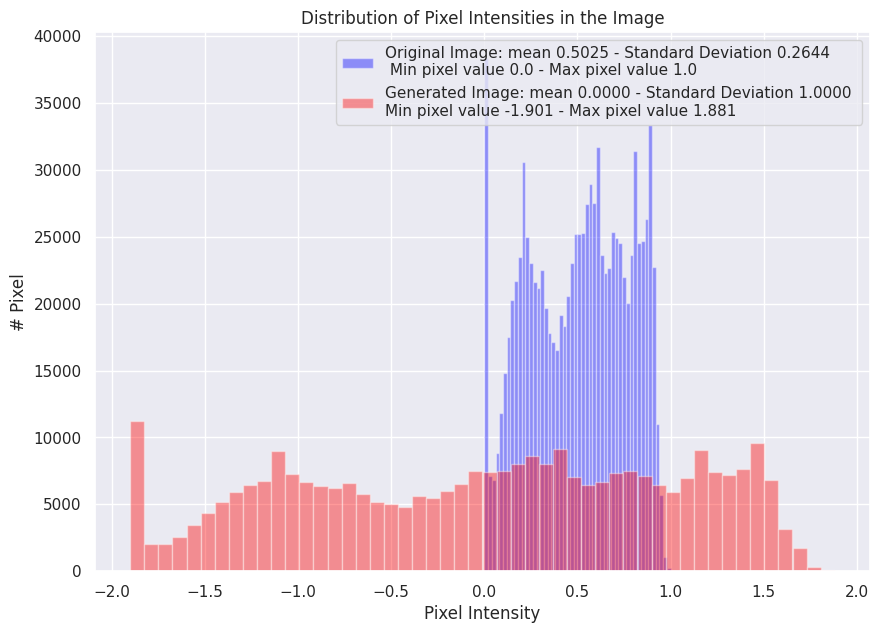

In [ ]:
# Include a histogram of the distribution of the pixels
sns.set()
plt.figure(figsize=(10, 7))

# Plot histogram for original iamge
sns.distplot(raw_image.ravel(),
             label=f'Original Image: mean {np.mean(raw_image):.4f} - Standard Deviation {np.std(raw_image):.4f} \n '
             f'Min pixel value {np.min(raw_image):.4} - Max pixel value {np.max(raw_image):.4}',
             color='blue',
             kde=False)

# Plot histogram for generated image
sns.distplot(generated_image[0].ravel(),
             label=f'Generated Image: mean {np.mean(generated_image[0]):.4f} - Standard Deviation {np.std(generated_image[0]):.4f} \n'
             f'Min pixel value {np.min(generated_image[0]):.4} - Max pixel value {np.max(generated_image[0]):.4}',
             color='red',
             kde=False)

# Place legends
plt.legend()
plt.title('Distribution of Pixel Intensities in the Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('# Pixel')

# Challenges with Medical Datasets

## 1. Class Imbalance

Prevalence of normal examples (y=0) is much higher than prevalence of diseased examples (y=1)

Using the Binary cross-entropy loss function will result in normal examples influencing the training more than the diseased examples.  
###Binary Cross-Entropy Loss
$$ L_{cross-entropy}(x_i)=-(y_ilog(f(x_i))+(1-y_i)log(1-f(x_i)))$$
where $x_i$ and $y_i$ are the input features and the label of the $i^{th}$ training data case, and $f(x_i)$ is the output of the model, ie. the probability that it is positive (ie. y=1)

Average cross entropy over entire training set $D$ of size $N$:
$$ L_{cross-entropy}(D)=-\frac{1}{N}\big(\sum_{\text{positive examples}}log(f(x_i))+\sum_{\text{negative examples}}log(1-f(x_i))\big)$$


To account for this use a **Weighted Binary Cross-Entropy Loss Function**
$$ L(X,y) = \begin{cases}w_{p} \times -\log P(Y=1|X) \text{ if } y=1, \\w_{n} \times -\log P(Y=0|X) \text{ if } y=0 \end{cases} $$
where $$ w_{p}= \frac{\text{num neg examples}}{\text{num total}} ~~~~ w_{n}=\frac{\text{num pos examples}}{\text{num total}}$$

$$ L^w_{cross-entropy}(x)=-(w_pylog(f(x))+w_n(1-y)log(1-f(x)))$$

**Note:** Loss can never be negative because of the negative log

# Lab: Counting Labels & Weighted Loss Function

In [ ]:
#Count the number of instances of each class (drop non-class columns from the counts)
class_counts = train_df.sum().drop(["Follow-up #", 'Patient ID', 'Patient Age', 'Patient Sex', 'Image Index', 'Finding Labels', 'View Position', 'OriginalImage[Width', 'Height]', 'OriginalImagePixelSpacing[x', 'y]'])


In [ ]:
class_counts

,0
Consolidation,8
Cardiomegaly,37
Edema,21
Atelectasis,17
Pneumonia,2
Fibrosis,5
Mass,16
Pleural_Thickening,9
Effusion,31
No Finding,64


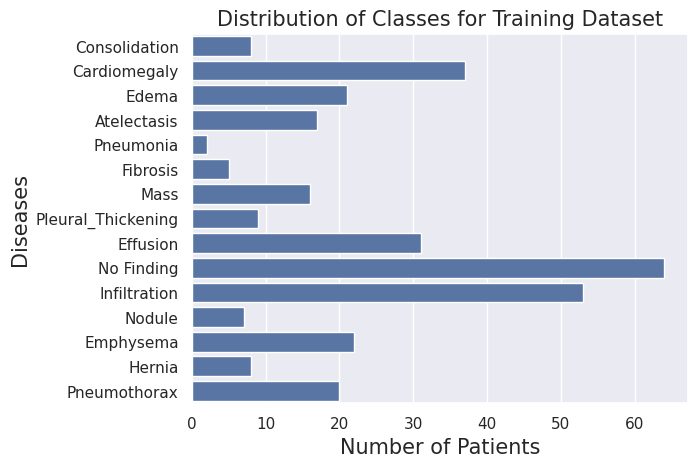

In [ ]:
sns.barplot(class_counts, color='b', orient="h")
plt.title('Distribution of Classes for Training Dataset', fontsize=15)
plt.ylabel('Diseases', fontsize=15)
plt.xlabel('Number of Patients', fontsize=15)
plt.show()

In [ ]:
# unweighted
y_true = np.array([[1,0], [1,0], [1,0], [1,0], [0,1]])
y_pred = np.ones(y_true.shape)
y_pred[:,0] = 0.3 * y_pred[:,0]
y_pred[:,1] = 0.7 * y_pred[:,1]
loss_reg_0 = -1 * np.sum(y_true[:,0] * np.log(y_pred[:,0])) -1 * np.sum((1-y_true[:,0])*np.log(1-y_pred[:,0]))
loss_reg_1 = -1 * np.sum(y_true[:,1] * np.log(y_pred[:,1])) -1 * np.sum((1-y_true[:,1])*np.log(1-y_pred[:,1]))

print(y_true)
print(y_pred)
print(f"unweighted loss_reg_1: {loss_reg_0:.4f}")
print(f"unweighted loss_reg_2: {loss_reg_1:.4f}")

# Because data is imbalanced (more data with label 1) the model with 0.1
# predictions is implied to perform worse than the model prediction 0.9

[[1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]]
[[0.3 0.7]
 [0.3 0.7]
 [0.3 0.7]
 [0.3 0.7]
 [0.3 0.7]]
unweighted loss_reg_1: 5.1726
unweighted loss_reg_2: 5.1726


In [ ]:
# calculate the positive weight as the fraction of negative labels
w_p = np.sum(y_true==0, axis=0)/y_true.shape[0]
# calculate the negative weight as the fraction of positive labels
w_n = np.sum(y_true==1, axis=0)/y_true.shape[0]

print(f"positive weight: {np.array_str(w_p, precision=4)}")
print(f"negative weight: {np.array_str(w_n, precision=4)}")

loss_0 = -1 * np.sum(w_p[0] * y_true[:,0] * np.log(y_pred[:,0])) -1 * np.sum(w_n[0] * (1-y_true[:,0])*np.log(1-y_pred[:,0]))
loss_1 = -1 * np.sum(w_p[1] * y_true[:,1] * np.log(y_pred[:,1])) -1 * np.sum(w_n[1] * (1-y_true[:,1])*np.log(1-y_pred[:,1]))
loss = -1 * np.sum(w_p * y_true * np.log(y_pred),axis=0) -1 * np.sum(w_n * (1-y_true)*np.log(1-y_pred),axis=0)

print(f"loss_0: {loss_0:.4f}")
print(f"loss_1: {loss_1:.4f}")
print(f"loss: {np.array_str(loss, precision=4)}")



positive weight: [0.2 0.8]
negative weight: [0.8 0.2]
loss_0: 1.2485
loss_1: 1.2485
loss: [1.2485 1.2485]


# 1. Class Imbalance
## Resampling
Another approach to addressing challenge of class imbalance is to resample the data to achieve a better balance between normal and dieseased samples by repeating dieseased examples and potentially taking a subset of the normal samples


# 2. Multi-Task Learning
Use model to identify multiple different diseases
Labels and predictions will become an array ie. a target per disease

$$L(X,y) = L(X,y_{mass}) + L(X,y_{pneumonia}), L(X,y_{edema})$$

#3. Dataset Size
Use existing CNN models with **transfer learning**. Eg use pre-trained CNN then fine-tune with medical dataset.
Early layers of CNN learn general features, and later layers learn higher-layer features.  
eg. Densenet: [Densely Connected Convolutional Networks](https://arxiv.org/pdf/1608.06993)

Medical image datasets typically have 10k-100k examples

In [ ]:
from keras.applications.densenet import DenseNet121
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model
from keras import backend as K

import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [ ]:
# Create the base pre-trained model
base_model = DenseNet121(weights='imagenet', include_top=False);

29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Print the model summary
base_model.summary()

Model: "densenet121"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, None,      │          0 │ -                 │
│ (InputLayer)        │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d      │ (None, None,      │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, None,      │      9,408 │ zero_padding2d[0… │
│                     │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, None,      │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, None,      │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_1    │ (None, None,      │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1               │ (None, None,      │          0 │ zero_padding2d_1… │
│ (MaxPooling2D)      │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, None,      │        256 │ pool1[0][0]       │
│ (BatchNormalizatio… │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_relu │ (None, None,      │          0 │ conv2_block1_0_b… │
│ (Activation)        │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, None,      │      8,192 │ conv2_block1_0_r… │
│ (Conv2D)            │ None, 128)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, None,      │        512 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ None, 128)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, None,      │          0 │ conv2_block1_1_b… │
│ (Activation)        │ None, 128)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, None,      │     36,864 │ conv2_block1_1_r… │
│ (Conv2D)            │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_concat │ (None, None,      │          0 │ pool1[0][0],      │
│ (Concatenate)       │ None, 96)         │            │ conv2_block1_2_c… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_bn   │ (None, None,      │        384 │ conv2_block1_con… │
│ (BatchNormalizatio… │ None, 96)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_relu │ (None, None,      │          0 │ conv2_block2_0_b… │
│ (Activation)        │ None, 96)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_1_conv │ (None, None,      │     12,288 │ conv2_block2_0_r

 Total params: 7,037,504 (26.85 MB)

 Trainable params: 6,953,856 (26.53 MB)

 Non-trainable params: 83,648 (326.75 KB)

In [ ]:
# Print out the first five layers
layers_l = base_model.layers

print("First 5 layers")
layers_l[0:5]


First 5 layers


[<InputLayer name=input_layer, built=True>,
 <ZeroPadding2D name=zero_padding2d, built=True>,
 <Conv2D name=conv1_conv, built=True>,
 <BatchNormalization name=conv1_bn, built=True>,
 <Activation name=conv1_relu, built=True>]

In [ ]:
print("Last 5 layers")
layers_l[-6:-1]

Last 5 layers


[<BatchNormalization name=conv5_block16_1_bn, built=True>,
 <Activation name=conv5_block16_1_relu, built=True>,
 <Conv2D name=conv5_block16_2_conv, built=True>,
 <Concatenate name=conv5_block16_concat, built=True>,
 <BatchNormalization name=bn, built=True>]

In [ ]:
# Get the convolutional layers and print the first 5
conv2D_layers = [layer for layer in base_model.layers
                if str(type(layer)).find('Conv2D') > -1]
print("The first five conv2D layers")
conv2D_layers[0:5]

The first five conv2D layers


[<Conv2D name=conv1_conv, built=True>,
 <Conv2D name=conv2_block1_1_conv, built=True>,
 <Conv2D name=conv2_block1_2_conv, built=True>,
 <Conv2D name=conv2_block2_1_conv, built=True>,
 <Conv2D name=conv2_block2_2_conv, built=True>]

In [ ]:
print(f"There are {len(conv2D_layers)} convolutional layers")

There are 120 convolutional layers


In [ ]:
print("the input has 3 channels")
base_model.input

the input has 3 channels


<KerasTensor shape=(None, None, None, 3), dtype=float32, sparse=False, ragged=False, name=keras_tensor>

In [ ]:
print("The output has 1024 channels")
x = base_model.output
x

The output has 1024 channels


<KerasTensor shape=(None, None, None, 1024), dtype=float32, sparse=False, ragged=False, name=keras_tensor_426>

In [ ]:
# Add a global spatial average pooling layer
x_pool = GlobalAveragePooling2D()(x)
x_pool

<KerasTensor shape=(None, 1024), dtype=float32, sparse=False, ragged=False, name=keras_tensor_427>

In [ ]:
# Defina a set of five class labels to use as an example
labels = ['Emphysema',
          'Hernia',
          'Mass',
          "Pneumonia",
          'Edema']
n_classes = len(labels)
print(f"In this example, you want your model to indentify {n_classes} classes")

In this example, you want your model to indentify 5 classes


In [ ]:
# Add a logistic layer the same size as the number of classes you're trying to predict
predictions = Dense(n_classes, activation="sigmoid")(x_pool)
print(f"Predictions have {n_classes} units, one for each class")
predictions

Predictions have 5 units, one for each class


<KerasTensor shape=(None, 5), dtype=float32, sparse=False, ragged=False, name=keras_tensor_428>

In [ ]:
# Create an updated model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy')

#3. Small Dataset Size: Data Augmentation
Data Augmentation can be used to create more data by applying various types of transformations to the existing dataset eg. rotation, flipping, tranlation, zooming, cropping, applying higher contrast or colour noise.

Need to ensure:
1. We select variations that we think that will reflect real world variation.
2. That the label will be preserved with the transformation

# Model Testing
1. Training Set: Use to develop models
2. Validation Set: Used to tune hyper-parameters and select models
3. Test Set: Used to report results

## 3 Challenges:
1. Patient Overlap: need to ensure that same patients are always in one dataset
2. Set Sampling
3. Ground Truth


# Patient Overlap and Data Leakage Lab

In [31]:
train_df.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Sex,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,...,Atelectasis,Fibrosis,Pneumothorax,No Finding,Consolidation,Hernia,Infiltration,Pneumonia,Pleural_Thickening,Effusion
0,00000001_000.png,Cardiomegaly,0,1,57,M,PA,2682,2749,0.143,...,0,0,0,0,0,0,0,0,0,0
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,...,0,0,0,0,0,0,0,0,0,0
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,...,0,0,0,0,0,0,0,0,0,1
3,00000002_000.png,No Finding,0,2,80,M,PA,2500,2048,0.171,...,0,0,0,1,0,0,0,0,0,0
4,00000003_001.png,Hernia,0,3,74,F,PA,2500,2048,0.168,...,0,0,0,0,0,1,0,0,0,0


In [32]:
# Extract patient id's
ids_train = train_df["Patient ID"].values
ids_train_set = set(ids_train)
print(f"There are {len(ids_train_set)} unique Patient IDs in the training set")

# Identify patient overlap with a validation set
#patient_overlap = list(ids_train_set.intersection(ids_valid_set))
#n_overlap = len(patient_overlap)
#print(f"There are {n_overlap} Patient IDs in both the training and validation sets")

# Can then remove overlapping patients from the validation set (or training set)
# valid_df.drop(valid_overlap_idxs, inplace=True)

There are 41 unique Patient IDs in the training set


In [19]:
train_df_copy = train_df.copy()
ids_train_copy = train_df_copy["Patient ID"]
ids_train_copy_set = set(ids_train_copy)
#print(train_df_copy.describe())
print(len(train_df_copy))
print(ids_train_copy_set)
print(f"There are {len(ids_train_copy_set)} unique Patient IDs in the training set")

200
{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41}
There are 41 unique Patient IDs in the training set


In [25]:
# generate random list of patient ids that we'll pretend are overlapping with validation set
random_patient_ids = np.random.choice(list(ids_train_copy_set), size=5, replace=False)

print(random_patient_ids)


[ 6 37 35 38 16]


In [30]:
leakage = not ids_train_copy_set.intersection(random_patient_ids)

False

In [35]:
# drop these patient ids directly from df
for overlap_id in random_patient_ids:
  train_df_copy.drop(train_df_copy[train_df_copy["Patient ID"].isin(overlap_id)].index, inplace=True)

In [36]:
train_df_copy.describe()

,Follow-up #,Patient ID,Patient Age,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Mass,Nodule,Emphysema,...,Atelectasis,Fibrosis,Pneumothorax,No Finding,Consolidation,Hernia,Infiltration,Pneumonia,Pleural_Thickening,Effusion
count,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,...,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000
mean,9.393939,17.212121,66.848485,2627.477273,2499.045455,0.156733,0.156733,0.121212,0.045455,0.159091,...,0.068182,0.022727,0.151515,0.356061,0.007576,0.060606,0.181818,0.007576,0.053030,0.136364
std,13.128698,11.445210,9.029625,357.931194,396.462831,0.017258,0.017258,0.327617,0.209092,0.367154,...,0.253018,0.149600,0.359916,0.480658,0.087039,0.239515,0.387164,0.087039,0.224948,0.344482
min,0.000000,1.000000,47.000000,1725.000000,2020.000000,0.139000,0.139000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,11.000000,60.000000,2500.000000,2048.000000,0.143000,0.143000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,13.000000,67.500000,2579.000000,2544.000000,0.143000,0.143000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,13.250000,23.000000,75.000000,2992.000000,2991.000000,0.168000,0.168000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,46.000000,41.000000,84.000000,3056.000000,2991.000000,0.194311,0.194311,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Modelling Challenge #2: Sampling
Ensure training and validation sets have a certain percentage of minority cases eg. 50%
This may result in test set having lower percentage of minority cases but can be tackled by handling unbalanced dataset

# Modelling Challenge #3: Ground Truth
Because it is common to have inter-observer disagreement on a diagnosis in medical diagnosis can use:
1. **Consensus voting** to determine ground truth/reference label
2. Additional/more definitive medical testing to get more conclusive results (may not be available)

# Chest X-Ray Medical Diagnosis Assignment
Using the [ChestX-Ray8 dataset](https://arxiv.org/abs/1705.02315) containing 14 different labelled pathological conditions.
You can download the entire dataset for free [here](https://nihcc.app.box.com/v/ChestXray-NIHCC).

In [ ]:
!pip install keras

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.applications.densenet import DenseNet121
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model
from keras import backend as K

from keras.models import load_model

#import util
#from public_tests import *
#from test_utils import *

import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [ ]:
train_df = pd.read_csv("data/nih/train-small.csv")
valid_df = pd.read_csv("data/nih/valid-small.csv")

test_df = pd.read_csv("data/nih/test.csv")

train_df.head()

In [ ]:
labels = ['Cardiomegaly',
          'Emphysema',
          'Effusion',
          'Hernia',
          'Infiltration',
          'Mass',
          'Nodule',
          'Atelectasis',
          'Pneumothorax',
          'Pleural_Thickening',
          'Pneumonia',
          'Fibrosis',
          'Edema',
          'Consolidation']

## Preparing Images
To set up the model to consume the images use the ImageDataGenerator from the Keras framework which allows us to create a generator for images specified in a dataframe.

We need to build a new generator for validation and testing data because the generator normalizes each image per batch, meaning it uses batch statistics.  In a real scenario we don't process incoming images in batches, and knowing the average per batch of test data would give our model an advantage.  The model shouldn't have any information about the test data.

We do need to normalize the incoming test data using the statistics **computed from the training set**
Ideally we would compute the sample mean and standard deviation from the entire training data, but due to large size this would be very time consuming therefore we take a random sample of the dataset and compute the sample mean and sample std dev.


In [9]:
def get_train_generator(df, image_dir, x_col, y_cols, shuffle=True, batch_size=8, seed=1, target_w = 320, target_h = 320):
  """
  Return generator for training set, normalzing using batch statistics.

  Args:
      train_df (dataframe): dataframe specifying training data.
      image_dir (str): directory where image files are held.
      x_col (str): name of column in df that holds filenames.
      y_cols (list): list of strings that hold y labels for images.
      batch_size (int): images per batch to be fed into model during training.
      seed (int): random seed.
      target_w (int): final width of input images.
      target_h (int): final height of input images.

    Returns:
        train_generator (DataFrameIterator): iterator over training set
    """
  print("getting train generator...")
  # normalize images
  image_generator = ImageDataGenerator(
      samplewise_center=True,
      samplewise_std_normalization=True)

  # flow from directory with specified batch size and target image size
  generator = image_generator.flow_from_dataframe(
          dataframe=df,
          directory=image_dir,
          x_col=x_col,
          y_col=y_cols,
          class_mode="raw",
          batch_size=batch_size,
          shuffle=shuffle,
          seed=seed,
          target_size=(target_w, target_h))
  return generator

In [12]:
def get_test_and_valid_generator(valid_df, test_df, train_df, image_dir, x_col,
                                 y_cols, sample_size=10, batch_size=8, seed=1, target_w=320, target_h=320):
  """
  Return generator for validation set and test set using
  normalization statistics from training set.

  Args:
    valid_df (dataframe): dataframe specifying validation data.
    test_df (dataframe): dataframe specifying test data.
    train_df (dataframe): dataframe specifying training data.
    image_dif (str): directory where image files are held.
    x_col (str): name of column in df that holds filenames.
    y_cols (list): list of strings that hold y labels for images.
    sample_size (int): size of random sample to use for normalization.
    batch_size (int): images per batch to be fed into model during training.
    seed(int): random seed.
    target_w (int): final width of input images.
    target_h (int): final height of input images.

  Returns:
    test_generator (DataFrameIterator): iterator over test set
    valid_generator (DataFrameIterator): iterator over validation set
  """
  print("getting train and valid generators...")
  # get generator to sample dataset
  raw_train_generator = ImageDataGenerator().flow_from_dataframe(
      dataframe=train_df,
      directory=image_dir,
      x_col="Image",
      y_col=labels,
      class_mode="raw",
      batch_size=sample_size,
      shuffle=True,
      target_size=(target_w, target_h))

  # get data sample
  data_sample_df = raw_train_generator.next()
  data_sample = batch[0]

  # use sample to fit mean and std for test set generator
  image_generator = ImageDataGenerator(
      featurewise_center=True,
      featurewise_std_normalization= True)

  # fit generator to sample from training data
  image_generator.fit(data_sample)

  # get test generator
  valid_generator = image_generator.flow_from_dataframe(
      dataframe=valid_df,
      directory=image_dir,
      x_col=x_col,
      y_col=y_cols,
      class_mode="raw",
      batch_size=batch_size,
      shuffle=False,
      seed=seed,
      target_size=(target_w, target_h))

  test_generator = image_generator.flow_from_dataframe(
      dataframe=test_df,
      directory=image_dir,
      x_col=x_col,
      y_col=y_cols,
      class_mode="raw",
      batch_size=batch_size,
      shuffle=False,
      seed=seed,
      target_size=(target_w, target_h))
  return valid_generator, test_generator

In [ ]:
IMAGE_DIR = "data/nih/images-small/"
train_generator = get_train_generator(train_df, IMAGE_DIR, "Image", labels)
valid_generator, test_generator = get_test_and_valid_generator(valid_df, test_df, train_df, IMAGE_DIR, "Image", labels)

# peek into what the generator gives our model during training and validation.
x, y = train_generator.__getitem__(0)
plt.imshow(x[0])

## Model Development
Need to address **Class Imbalance**
Then use the pre-trained [DenseNet121](https://www.kaggle.com/datasets/pytorch/densenet121) model.  Can be loaded directly from Keras and then can add two layers on top of it:
1. A GlobalAveragePooling2D layer to get the average of the last convolution layers from DenseNet121
2. A Dense layer with sigmoid activiation to get the prediction logits for each of our classes

Set our custom loss function by specifying the loss parameter in the compile function

NameError: name 'labels' is not defined

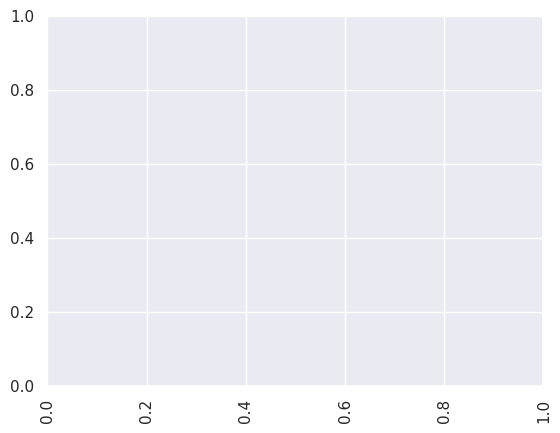

In [13]:
plt.xticks(rotation=90)
plt.bar(x=labels, height=np.mean(train_generator.labels, axis=0))
plt.title("Frequency of Each Class")
plt.show()

In [14]:
def compute_class_freqs(labels):
  """
  Compute positive and negative frequencies for each class.

  Args:
    labels (np.array): matrix of labels, size (num_examples, num_classes)
  Returns:
    positive_frequencies (np.array): array of positive frequencies for each class, size (num classes)
    negative_frequencies (np.array): array of negative frequencies for each class, size (num classes)
  """
  # total number of examples (rows)
  num_examples = labels.shape[0]
  positive_frequencies = np.sum(labels, axis=0)/num_examples
  negative_frequencies = 1 - positive_frequencies
  return positive_frequencies, negative_frequencies

In [ ]:
freq_pos, freq_neg = compute_class_freqs(train_generator.labels)

In [ ]:
data = pd.DataFrame({"Class": labels, "Label": "Positive", "Value": freq_pos})
data = data.append([{"Class": labels[l], "Label": "Negative", "Value": v} for l,v in enumerate(freq_neg)])

plt.xticks(rotation=90)
f = sns.barplot(x="Class", y="Value", hue="Label" ,data=data)

In [ ]:
def get_weighted_loss(pos_weights, neg_weights, epsilon=1e-7):
    """
    Return weighted loss function given negative weights and positive weights.

    Args:
      pos_weights (np.array): array of positive weights for each class, size (num_classes)
      neg_weights (np.array): array of negative weights for each class, size (num_classes)

    Returns:
      weighted_loss (function): weighted loss function
    """
    def weighted_loss(y_true, y_pred):
        """
        Return weighted loss value.

        Args:
            y_true (Tensor): Tensor of true labels, size is (num_examples, num_classes)
            y_pred (Tensor): Tensor of predicted labels, size is (num_examples, num_classes)
        Returns:
            loss (float): overall scalar loss summed across all classes
        """
        # initialize loss to zero
        loss = 0.0

        ### START CODE HERE (REPLACE INSTANCES OF 'None' with your code) ###

        for i in range(len(pos_weights)):
            # for each class, add average weighted loss for that class
            loss += -1 * tf.keras.backend.mean(pos_weights[i] * y_true[:,i] * tf.keras.backend.log(y_pred[:,i]+epsilon)) - tf.keras.backend.mean(neg_weights[i] * (1-y_true[:,i]) * tf.keras.backend.log(1-y_pred[:,i]+epsilon))
        return loss

        ### END CODE HERE ###
    return weighted_loss

In [ ]:
# create the base pre-trained model
base_model = DenseNet121(weights='models/nih/densenet.hdf5', include_top=False)

x = base_model.output

# add a global spatial average pooling layer
x = GlobalAveragePooling2D()(x)

# and a logistic layer
predictions = Dense(len(labels), activation="sigmoid")(x)

model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer='adam', loss=get_weighted_loss(pos_weights, neg_weights))

In [ ]:
##### Model Training !!!!! Compute Intensive !!!!! #######
# history = model.fit_generator(train_generator,
#                               validation_data=valid_generator,
#                               steps_per_epoch=100,
#                               validation_steps=25,
#                               epochs = 3)

# plt.plot(history.history['loss'])
# plt.ylabel("loss")
# plt.xlabel("epoch")
# plt.title("Training Loss Curve")
# plt.show()

####### OR
# Load pre-computed weights
# model.load_weights("models/nih/pretrained_model.h5")

###Training on the Larger Dataset
Given that the original dataset is 40GB+ in size and the training process on the full dataset takes a few hours, we have trained the model on a GPU-equipped machine for you and provided the weights file from our model (with a batch size of 32 instead) to be used for the rest of this assignment.

The model architecture for our pre-trained model is exactly the same, but we used a few useful Keras "callbacks" for this training. Do spend time to read about these callbacks at your leisure as they will be very useful for managing long-running training sessions:

1. You can use ModelCheckpoint callback to monitor your model's val_loss metric and keep a snapshot of your model at the point.
2. You can use the TensorBoard to use the Tensorflow Tensorboard utility to monitor your runs in real-time.
3. You can use the ReduceLROnPlateau to slowly decay the learning rate for your model as it stops getting better on a metric such as val_loss to fine-tune the model in the final steps of training.
4. You can use the EarlyStopping callback to stop the training job when your model stops getting better in it's validation loss. You can set a patience value which is the number of epochs the model does not improve after which the training is terminated. This callback can also conveniently restore the weights for the best metric at the end of training to your model.

Read about these callbacks and other useful Keras callbacks [here](https://keras.io/api/callbacks/).


Details about the best performing methods and their performance can be found here.  These models take advantage of a few other tricks such as self-training and ensembling



*   [CheXNet](https://arxiv.org/abs/1711.05225)
*   [CheXpert](https://arxiv.org/pdf/1901.07031)
*   [CheXNeXt](https://journals.plos.org/plosmedicine/article?id=10.1371/journal.pmed.1002686)

##Prediction and Evaluation
###ROC Curve and AUROC
AUC (Area Under the Curve) is a metric computed from the ROC [(Receiver Operating Characteristic)](https://en.wikipedia.org/wiki/Receiver_operating_characteristic) curve.  Also referred to as AUROC value

To interpret the plot, in simple terms, a curve that is more to the left and the top has more "area" under it, indicating the model is performing better

Can be computed using sklearn library as seen in implementation below

Models will publish their AUC figures for certain datasets as a point of comparison.  

In [ ]:
predicted_vals = model.predict_generator(test_generator, steps = len(test_generator))

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
def get_roc_curve(labels, predicted_vals, generator):
    auc_roc_vals = []
    for i in range(len(labels)):
        try:
            gt = generator.labels[:, i]
            pred = predicted_vals[:, i]
            auc_roc = roc_auc_score(gt, pred)
            auc_roc_vals.append(auc_roc)
            fpr_rf, tpr_rf, _ = roc_curve(gt, pred)
            plt.figure(1, figsize=(10, 10))
            plt.plot([0, 1], [0, 1], 'k--')
            plt.plot(fpr_rf, tpr_rf,
                     label=labels[i] + " (" + str(round(auc_roc, 3)) + ")")
            plt.xlabel('False positive rate')
            plt.ylabel('True positive rate')
            plt.title('ROC curve')
            plt.legend(loc='best')
        except:
            print(
                f"Error in generating ROC curve for {labels[i]}. "
                f"Dataset lacks enough examples."
            )
    plt.show()
    return auc_roc_vals

In [1]:
auc_rocs = get_roc_curve(labels, predicted_vals, test_generator)

NameError: name 'get_roc_curve' is not defined

##Visualization Learning with GradCAM
Deep machine learning has the challenge that the complex architecture used for neural networks makes it harder to inerpret.
**Class Activation Maps (CAM)** is an approach to increase the interpretability of models for computer vision tasks
[GradCAM](https://arxiv.org/abs/1610.02391) produces a heatmap highlighting the important regions in the image for predicting the pathological condition.   GradCAM does not provide a full explanation of the reasoning for each classification probability.  But it is till useful for debugging the model and augmenting our prediction to validate that the model is focusing on the right regions of the image.

In [ ]:
import random

import cv2
import matplotlib.pyplot as plt
import numpy as np
from keras import backend as K
from keras.preprocessing import image
from tensorflow.compat.v1.logging import INFO, set_verbosity
import os

random.seed(a=None, version=2)

set_verbosity(INFO)

def get_mean_std_per_batch(image_dir, df, H=320, W=320):
    sample_data = []
    for img in df.sample(100)["Image"].values:
        image_path = os.path.join(image_dir, img)
        sample_data.append(
            np.array(image.load_img(image_path, target_size=(H, W))))

    mean = np.mean(sample_data, axis=(0, 1, 2, 3))
    std = np.std(sample_data, axis=(0, 1, 2, 3), ddof=1)
    return mean, std


def load_image(img, image_dir, df, preprocess=True, H=320, W=320):
    """Load and preprocess image."""
    mean, std = get_mean_std_per_batch(image_dir, df, H=H, W=W)
    img_path = os.path.join(image_dir, img)
    x = image.load_img(img_path, target_size=(H, W))
    if preprocess:
        x -= mean
        x /= std
        x = np.expand_dims(x, axis=0)
    return x


def grad_cam(input_model, image, cls, layer_name, H=320, W=320):
    """GradCAM method for visualizing input saliency."""
    y_c = input_model.output[0, cls]
    conv_output = input_model.get_layer(layer_name).output
    grads = K.gradients(y_c, conv_output)[0]

    gradient_function = K.function([input_model.input], [conv_output, grads])

    output, grads_val = gradient_function([image])
    output, grads_val = output[0, :], grads_val[0, :, :, :]

    weights = np.mean(grads_val, axis=(0, 1))
    cam = np.dot(output, weights)

    # Process CAM
    cam = cv2.resize(cam, (W, H), cv2.INTER_LINEAR)
    cam = np.maximum(cam, 0)
    cam = cam / cam.max()
    return cam

# This extracts the gradients of each predicted class, flowing into our model's final convolutional layer
def compute_gradcam(model, img, image_dir, df, labels, selected_labels,
                    layer_name='bn'):
    preprocessed_input = load_image(img, image_dir, df)
    predictions = model.predict(preprocessed_input)

    print("Loading original image")
    plt.figure(figsize=(15, 10))
    plt.subplot(151)
    plt.title("Original")
    plt.axis('off')
    plt.imshow(load_image(img, image_dir, df, preprocess=False), cmap='gray')

    j = 1
    for i in range(len(labels)):
        if labels[i] in selected_labels:
            print(f"Generating gradcam for class {labels[i]}")
            gradcam = grad_cam(model, preprocessed_input, i, layer_name)
            plt.subplot(151 + j)
            plt.title(f"{labels[i]}: p={predictions[0][i]:.3f}")
            plt.axis('off')
            plt.imshow(load_image(img, image_dir, df, preprocess=False),
                       cmap='gray')
            plt.imshow(gradcam, cmap='jet', alpha=min(0.5, predictions[0][i]))
            j += 1

